# ElasticNet model

We run an elasticnet model with various alphas and l1 weights 0.1, 0.25, 0.5, 0.75, 0.9, 1 to see if this improves upon the baseline linear model, which had MSE = 129.326 and MAE = 8.695

In [1]:
%run labqueue_common.ipynb

In [2]:
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime as dt

In [3]:
df = preprocess_dates_in_csv(pd.read_csv("labqueue_anon_1.csv"))

In [4]:
# Reindex dataframe for plotting
df.index = df["time_created"]

In [5]:
# Split data into train and test sets
TRAIN_START = dt.datetime(2017, 10, 24)
TRAIN_END = dt.datetime(2019, 1, 14)
TEST_START = dt.datetime(2019, 2, 5)
TEST_END = dt.datetime(2019, 3, 28)

def split_for_baseline_and_nn(X, y):
    X_train = X.loc[TRAIN_START:TRAIN_END]
    y_train = y.loc[TRAIN_START:TRAIN_END]
    X_test = X.loc[TEST_START:TEST_END]
    y_test = y.loc[TEST_START:TEST_END]
    return X_train, y_train, X_test, y_test

In [6]:
# Define the base features and  labels
BASE_FEATURES = ['sem_week_1', 'sem_week_2', 'sem_week_3', 'sem_week_4', 'sem_week_5',
       'sem_week_6', 'sem_week_fallspringbreak', 'sem_week_7', 'sem_week_8',
       'sem_week_9', 'sem_week_10', 'sem_week_11', 'sem_week_12',
       'sem_week_13', 'sem_week_14',
                 #'isSunday', 'isMonday', 'isTuesday', 'isWednesday', 
       #'isThursday', 'isFriday', 'isSaturday', 
                # 'cos126', 'cos226', 'cos217', 
       #'wait_time_30m_before_submit',
                 #'wait_time_90m_before_submit',
                 #'help_time_30m_before_submit'
                 #'help_time_90m_before_submit',
       'num_in_queue_before_us', 'TAs_this_hour','hour_created','minute_created',
       #'assignment_due_next_day', 
       #'assignment_due_day_of',
                 'more_TAs_than_queue',
        'day_of_217_due', 'day_of_226_due','day_of_126_due',
                'day_before_217_due', 'day_before_226_due','day_before_126_due']

# some unused features
#'sem_week_14',  <- needs to be added back in elasticnet
# 'isSaturday' <- needs to be added back in elasticnet 
# , 'day_of_217_due' 'day_of_226_due','day_of_126_due',
#'help_time_30m_before_submit',#'wait_time_30m_before_submit',
#'help_time_90m_before_submit', 'help_time_30m_before_submit',
#'hour_created',

LABEL = ['wait_time_in_minutes']

In [7]:
X = df[BASE_FEATURES]
y = df[LABEL]

In [8]:
X_train, y_train, X_test, y_test = split_for_baseline_and_nn(X, y)

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()

In [10]:
alpha = 0.1
l1_ratios=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]
for l1_ratio in l1_ratios:
    print("alpha: %.3f, l1_ratio: %.2f" % (alpha, l1_ratio))
    regr = linear_model.ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    regr.fit(min_max_scaler.fit_transform(X_train), y_train.values.ravel())
    y_pred = regr.predict(min_max_scaler.transform(X_test))
    y_pred = np.maximum(y_pred, 0)
    print("MSE = %.3f" % (mean_squared_error(y_test, y_pred)))
    print("MAE = %.3f" % (mean_absolute_error(y_test, y_pred)))
print("From this, we see that we should use l1 regularization only, and vary alpha.")

alpha: 0.100, l1_ratio: 0.10
MSE = 216.123
MAE = 12.104
alpha: 0.100, l1_ratio: 0.25
MSE = 212.244
MAE = 11.871
alpha: 0.100, l1_ratio: 0.50
MSE = 202.889
MAE = 11.376
alpha: 0.100, l1_ratio: 0.75
MSE = 182.217
MAE = 10.535
alpha: 0.100, l1_ratio: 0.90
MSE = 149.200
MAE = 9.392
alpha: 0.100, l1_ratio: 0.95
MSE = 131.999
MAE = 8.829
alpha: 0.100, l1_ratio: 1.00
MSE = 109.795
MAE = 7.902
From this, we see that we should use l1 regularization only, and vary alpha.


In [11]:
alphas = [0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15]#, 0.175, 0.2, 0.25, 0.3, 0.5, 1]
l1_ratio = 1.0
optimal_alpha = 0
optimal_l1_ratio = 1
best_error = 1000
for alpha in alphas:
    print("alpha: %.3f, l1_ratio: %.2f" % (alpha, l1_ratio))
    regr = linear_model.ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    regr.fit(min_max_scaler.fit_transform(X_train), y_train.values.ravel())
    y_pred = regr.predict(min_max_scaler.transform(X_test))
    y_pred = np.maximum(y_pred, 0)
    print("MSE = %.3f" % (mean_squared_error(y_test, y_pred)))
    print("MAE = %.3f" % (mean_absolute_error(y_test, y_pred)))
    if mean_squared_error(y_test, y_pred) < best_error:
        optimal_alpha = alpha
        optimal_l1_ratio = l1_ratio
        best_error = mean_squared_error(y_test, y_pred)

alpha: 0.001, l1_ratio: 1.00
MSE = 111.410
MAE = 7.741
alpha: 0.010, l1_ratio: 1.00
MSE = 110.638
MAE = 7.730
alpha: 0.025, l1_ratio: 1.00
MSE = 109.633
MAE = 7.721
alpha: 0.050, l1_ratio: 1.00
MSE = 108.833
MAE = 7.747
alpha: 0.075, l1_ratio: 1.00
MSE = 108.940
MAE = 7.809
alpha: 0.100, l1_ratio: 1.00
MSE = 109.795
MAE = 7.902
alpha: 0.125, l1_ratio: 1.00
MSE = 111.259
MAE = 8.014
alpha: 0.150, l1_ratio: 1.00
MSE = 112.924
MAE = 8.124


In [12]:
optimal_alpha

0.05

In [13]:
regr = linear_model.ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio)
regr.fit(min_max_scaler.fit_transform(X_train), y_train.values.ravel())
y_pred = regr.predict(min_max_scaler.transform(X_test))
y_pred = np.maximum(y_pred, 0)
print("MSE = %.3f" % (mean_squared_error(y_test, y_pred)))
print("MAE = %.3f" % (mean_absolute_error(y_test, y_pred)))

MSE = 108.833
MAE = 7.747


In [14]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:

COEF = regr.coef_
for i in range(len(BASE_FEATURES)):
    print("Feature: %s \t\t\t Coefficient: %.2f" % (BASE_FEATURES[i], COEF[i]))

49.42225398041956
Feature: sem_week_1 			 Coefficient: -6.20
Feature: sem_week_2 			 Coefficient: -1.69
Feature: sem_week_3 			 Coefficient: 2.63
Feature: sem_week_4 			 Coefficient: 0.91
Feature: sem_week_5 			 Coefficient: 0.29
Feature: sem_week_6 			 Coefficient: -0.00
Feature: sem_week_fallspringbreak 			 Coefficient: -10.64
Feature: sem_week_7 			 Coefficient: -3.27
Feature: sem_week_8 			 Coefficient: -0.00
Feature: sem_week_9 			 Coefficient: 0.31
Feature: sem_week_10 			 Coefficient: 0.54
Feature: sem_week_11 			 Coefficient: -4.20
Feature: sem_week_12 			 Coefficient: -0.00
Feature: sem_week_13 			 Coefficient: 8.80
Feature: sem_week_14 			 Coefficient: 0.70
Feature: num_in_queue_before_us 			 Coefficient: 112.22
Feature: TAs_this_hour 			 Coefficient: -52.27
Feature: hour_created 			 Coefficient: -34.61
Feature: minute_created 			 Coefficient: -4.35
Feature: more_TAs_than_queue 			 Coefficient: -4.90
Feature: day_of_217_due 			 Coefficient: 2.63
Feature: day_of_226_due 			 Co

In [15]:
optimal_l1_ratio

1.0

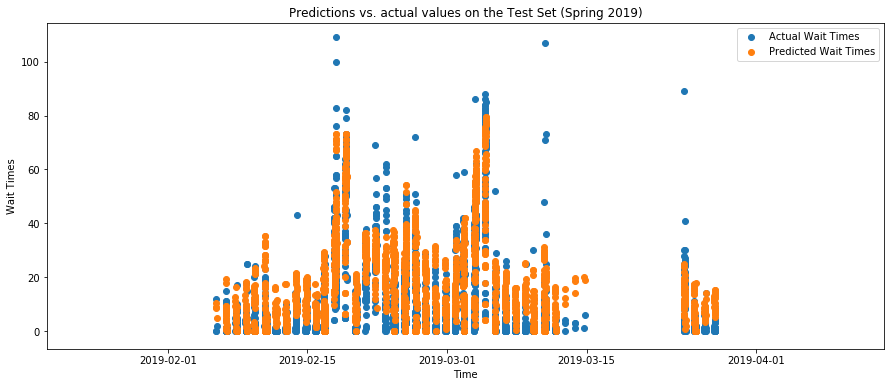

In [16]:
fig, ax = plt.subplots(figsize=(15,6))
plt.scatter(X_test.index, y_test.values,
            label='Actual Wait Times')
plt.scatter(X_test.index, y_pred,
            label='Predicted Wait Times')
plt.xlabel("Time")
plt.ylabel("Wait Times")
plt.title("Predictions vs. actual values on the Test Set (Spring 2019)")
plt.legend()
plt.show()

# Granular view of where the model is failing

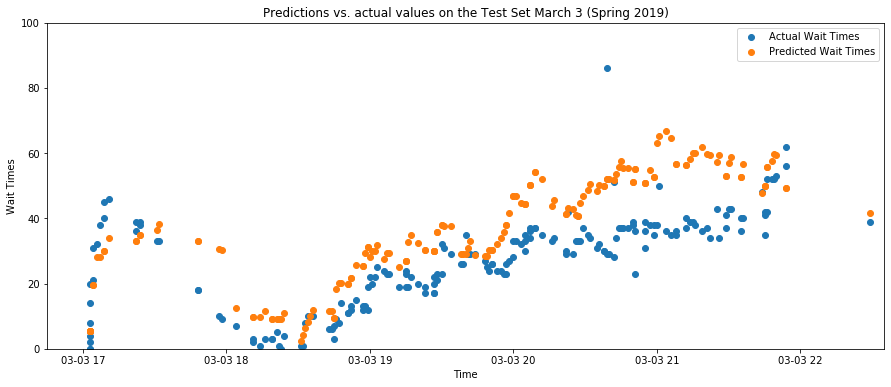

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
plt.scatter(X_test.index, y_test.values,
            label='Actual Wait Times')
plt.scatter(X_test.index, y_pred,
            label='Predicted Wait Times')
plt.xlabel("Time")
plt.ylabel("Wait Times")

plt.xlim((pd.Timestamp("2019-03-03 16:45:00"), pd.Timestamp("2019-03-03 22:35:00")))
plt.ylim((0,100))
plt.title("Predictions vs. actual values on the Test Set March 3 (Spring 2019)")
plt.legend()
plt.show()

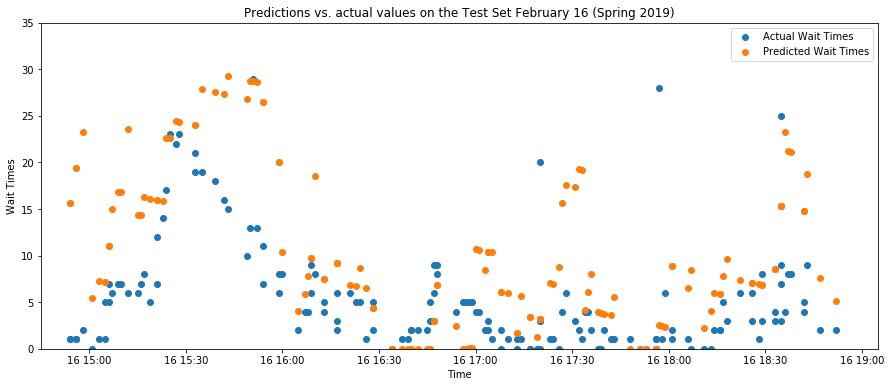

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
plt.scatter(X_test.index, y_test.values,
            label='Actual Wait Times')
plt.scatter(X_test.index, y_pred,
            label='Predicted Wait Times')
plt.xlabel("Time")
plt.ylabel("Wait Times")

plt.xlim((pd.Timestamp("2019-02-16 14:45:00"), pd.Timestamp("2019-02-16 19:05:00")))
plt.ylim((0,35))
plt.title("Predictions vs. actual values on the Test Set February 16 (Spring 2019)")
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


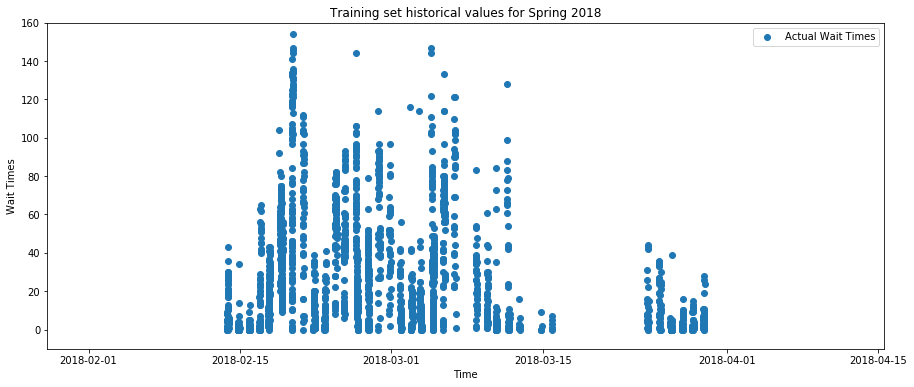

In [19]:
fig, ax = plt.subplots(figsize=(15,6))
plt.scatter(X_train.loc[pd.datetime(2018,2,1):pd.datetime(2018,3,30)].index,
            y_train.loc[pd.datetime(2018,2,1):pd.datetime(2018,3,30)].values,
            label='Actual Wait Times')
plt.xlabel("Time")
plt.ylabel("Wait Times")
plt.title("Training set historical values for Spring 2018")
plt.ylim(-10, 160)
plt.legend()
plt.show()

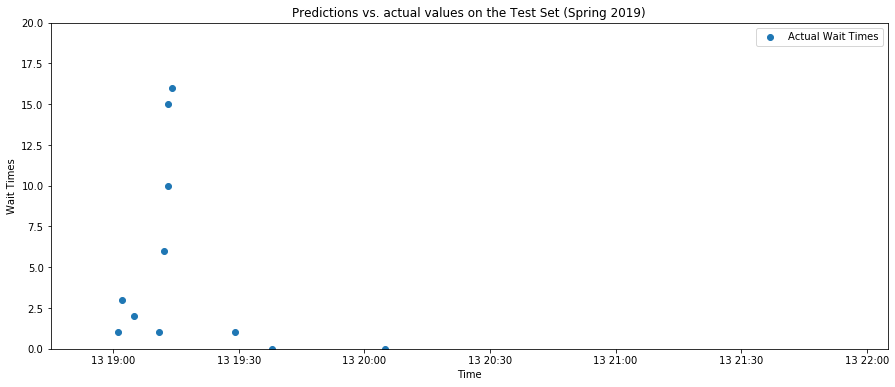

In [20]:
fig, ax = plt.subplots(figsize=(15,6))
plt.scatter(X_train.index, y_train.values,
            label='Actual Wait Times')
#plt.scatter(X_test.index, y_pred,
#            label='Predicted Wait Times')
plt.xlabel("Time")
plt.ylabel("Wait Times")

plt.xlim((pd.Timestamp("2018-09-13 18:45:00"), pd.Timestamp("2018-09-13 22:05:00")))
plt.ylim((0,20))
plt.title("Predictions vs. actual values on the Test Set (Spring 2019)")
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


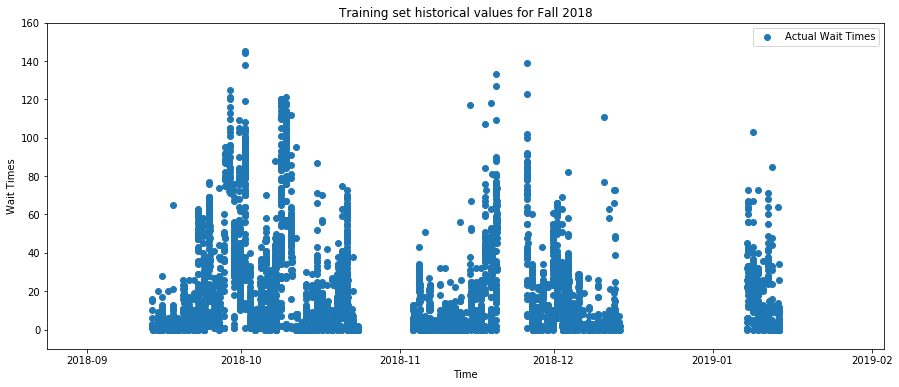

In [21]:
fig, ax = plt.subplots(figsize=(15,6))
plt.scatter(X_train.loc[pd.datetime(2018,9,1):pd.datetime(2019,1,20)].index,
            y_train.loc[pd.datetime(2018,9,1):pd.datetime(2019,1,20)].values,
            label='Actual Wait Times')
plt.xlabel("Time")
plt.ylabel("Wait Times")
plt.title("Training set historical values for Fall 2018")
plt.ylim(-10, 160)
plt.legend()
plt.show()